# Station Clustering

## available station

In [1]:
import pandas as pd
import numpy as np
station2019 = pd.read_csv('E:/SI/data/Station/station2019.csv')
station2020 = pd.read_csv('E:/SI/data/Station/station2020.csv')
station2021 = pd.read_csv('E:/SI/data/Station/station2021.csv')

## data load

In [2]:
#2019 Trip Data
frame = []
months = ['06','07','08','09','10']
for month in months:
        df = pd.read_csv("E:/SI/data/2019/2019"+month+"-citibike-tripdata.csv", delimiter=',')
        df = df[['tripduration', 'starttime','start station name', 'end station name', 'usertype']]
        df = df[(df['start station name'].isin(station2019['station name'])) & (df['end station name'].isin(station2019['station name']))]
        df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d')
        df['hour'] = df['starttime'].dt.hour  # Start time
        df['day'] = df['starttime'].dt.dayofweek + 1  # Day
        df['starttime'] = df['starttime'].apply(lambda x: x.strftime('%Y%m%d'))
        df = df[(df['tripduration'] <= 3600*6) & (df['tripduration'] >= 60)]
        frame.append(df)
df = pd.concat(frame)

holidays2019 = ['20190704','20190902','20191014']

weather = pd.read_csv('E:/SI/data/天气数据/KNYC 2019-01-01 to 2021-12-31.csv', delimiter=',')
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')
weather = weather[(weather['datetime'] >= pd.Timestamp(2019, 6, 1)) & (weather['datetime'] <= pd.Timestamp(2019, 10, 31))]
weather = weather[['datetime', 'precipprob']]
weather = weather[weather['precipprob'] == 0]
weather['day'] = weather['datetime'].dt.dayofweek + 1
weather['day'] = np.where(weather['day']<=5,'weekday','weekend')
for holiday in holidays2019: # 法定节假日
    weather['day'] = np.where(weather['datetime']==holiday,'weekend',weather['day'])
weather['norain'] = weather['datetime'].apply(lambda x: x.strftime('%Y%m%d'))
day_2019 = weather['day'].value_counts().to_dict() # day_2019['weekday']= the number of weekdays  day_2019['weekend']= 20
norain_2019 = weather['norain'].tolist()

df_2019 = df[df['starttime'].isin(norain_2019)]
df_2019['day'] = np.where(df_2019['day']<=5,'weekday','weekend')
for holiday in holidays2019: # 修改法定节假日
    df_2019['day'] = np.where(df_2019['starttime']==holiday,'weekend',df_2019['day']) 
df_2019_Sub = df_2019[df_2019['usertype'] == 'Subscriber']
df_2019_Cus = df_2019[df_2019['usertype'] == 'Customer']
df_2019_Sub.drop(labels=['starttime','usertype'],axis=1)
df_2019_Cus.drop(labels=['starttime','usertype'],axis=1)

# 防止crash
df_2019_Sub.to_csv('E:/SI/data/Typical Day/df_2019_Sub_6-10.csv',index=False)
df_2019_Cus.to_csv('E:/SI/data/Typical Day/df_2019_Cus_6-10.csv',index=False)

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
#2020 Trip Data
frame = []
months = ['06','07','08','09','10']
for month in months:
        df = pd.read_csv("E:/SI/data/2020/2020"+month+"-citibike-tripdata.csv", delimiter=',')
        df = df[['tripduration', 'starttime', 'start station name', 'end station name', 'usertype']]
        df = df[(df['start station name'].isin(station2020['station name']))
        & (df['end station name'].isin(station2020['station name']))]
        df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d')
        df['hour'] = df['starttime'].dt.hour  # 开始时间（几点）
        df['day'] = df['starttime'].dt.dayofweek + 1  # 周几
        df['starttime'] = df['starttime'].apply(lambda x: x.strftime('%Y%m%d'))
        df = df[(df['tripduration'] <= 3600*6) & (df['tripduration'] >= 60)]
        frame.append(df)
df = pd.concat(frame)

holidays2020 = ['20200703','20200907','20201012']

weather = pd.read_csv('E:/SI/data/天气数据/KNYC 2019-01-01 to 2021-12-31.csv', delimiter=',')
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')
weather = weather[(weather['datetime'] >= pd.Timestamp(2020, 6, 1)) & (weather['datetime'] <= pd.Timestamp(2020, 10, 31))]
weather = weather[['datetime', 'precipprob']]
weather = weather[weather['precipprob'] == 0]
weather['day'] = weather['datetime'].dt.dayofweek + 1
weather['day'] = np.where(weather['day']<=5,'weekday','weekend')
for holiday in holidays2020: # 法定节假日
    weather['day'] = np.where(weather['datetime']==holiday,'weekend',weather['day'])
weather['norain'] = weather['datetime'].apply(lambda x: x.strftime('%Y%m%d'))
day_2020 = weather['day'].value_counts().to_dict() # day_2020['weekday']= int  day_2020['weekend']= int
norain_2020 = weather['norain'].tolist()

df_2020 = df[df['starttime'].isin(norain_2020)]
df_2020['day'] = np.where(df_2020['day']<=5,'weekday','weekend')
for holiday in holidays2020: # 法定节假日
    df_2020['day'] = np.where(df_2020['starttime']==holiday,'weekend',df_2020['day'])
df_2020_Sub = df_2020[df_2020['usertype'] == 'Subscriber']
df_2020_Cus = df_2020[df_2020['usertype'] == 'Customer']
df_2020_Sub.drop(labels=['starttime','usertype'],axis=1)
df_2020_Cus.drop(labels=['starttime','usertype'],axis=1)

# 防止crash
df_2020_Sub.to_csv('E:/SI/data/Typical Day/df_2020_Sub_6-10.csv',index=False)
df_2020_Cus.to_csv('E:/SI/data/Typical Day/df_2020_Cus_6-10.csv',index=False)

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
#2021 Trip Data
frame = []
months = ['06','07','08','09','10']
for month in months:
    df = pd.read_csv("E:/SI/data/2021/2021"+month+"-citibike-tripdata.csv", delimiter=',')
    df = df[['started_at', 'ended_at', 'start_station_name',
         'end_station_name', 'member_casual']]
    df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d')
    df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d')
    df['tripduration'] = (df['ended_at']-df['started_at']).dt.total_seconds()
    df = df.drop(labels=['ended_at'], axis=1)
    df['member_casual'].loc[df['member_casual'] == 'member'] = 'Subscriber'
    df['member_casual'].loc[df['member_casual'] == 'casual'] = 'Customer'
    df.rename(columns={"member_casual": "usertype", 'started_at': 'starttime',
          'start_station_name': 'start station name', 'end_station_name': 'end station name'}, inplace=True)
    df = df[(df['start station name'].isin(station2021['station name']))
        & (df['end station name'].isin(station2021['station name']))]
    df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d')
    df['hour'] = df['starttime'].dt.hour  # 开始时间（几点）
    df['day'] = df['starttime'].dt.dayofweek + 1  # 周几
    df['starttime'] = df['starttime'].apply(lambda x: x.strftime('%Y%m%d'))
    df = df[(df['tripduration'] <= 3600*6) & (df['tripduration'] >= 60)]
    frame.append(df)
df = pd.concat(frame)

holidays2021 = ['20210705','20210906','20211011']

weather = pd.read_csv('E:/SI/data/天气数据/KNYC 2019-01-01 to 2021-12-31.csv', delimiter=',')
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')
weather = weather[(weather['datetime'] >= pd.Timestamp(2021, 6, 1)) & 
    (weather['datetime'] <= pd.Timestamp(2021, 10, 31))]
weather = weather[['datetime', 'precipprob']]
weather = weather[weather['precipprob'] == 0]
weather['day'] = weather['datetime'].dt.dayofweek + 1
weather['day'] = np.where(weather['day']<=5,'weekday','weekend')
for holiday in holidays2021: # 法定节假日
    weather['day'] = np.where(weather['datetime']==holiday,'weekend',weather['day'])
weather['norain'] = weather['datetime'].apply(lambda x: x.strftime('%Y%m%d'))
day_2021 = weather['day'].value_counts().to_dict() # day_2021['weekday']= int  day_2021['weekend']= int
norain_2021 = weather['norain'].tolist()

df_2021 = df[df['starttime'].isin(norain_2021)]
df_2021['day'] = np.where(df_2021['day']<=5,'weekday','weekend')
for holiday in holidays2021: # 修改法定节假日
    df_2021['day'] = np.where(df_2021['starttime']==holiday,'weekend',df_2021['day']) 
df_2021_Sub = df_2021[df_2021['usertype'] == 'Subscriber']
df_2021_Cus = df_2021[df_2021['usertype'] == 'Customer']
df_2021_Sub.drop(labels=['starttime','usertype'],axis=1)
df_2021_Cus.drop(labels=['starttime','usertype'],axis=1)

# 防止crash
df_2021_Sub.to_csv('E:/SI/data/Typical Day/df_2021_Sub_6-10.csv',index=False)
df_2021_Cus.to_csv('E:/SI/data/Typical Day/df_2021_Cus_6-10.csv',index=False)

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying t

In [6]:
# 防止crash
del df_2021
del df_2019
del df_2020
del df
del frame

## 次数统计

### peak nonpeak rest

In [537]:
# 数据导入
df = pd.read_csv('E:/SI/data/Typical Day/df_2021_Cus_6-10.csv', delimiter=',')
df_wk = df[df['day']=='weekday']
df_wd = df[df['day']=='weekend']

In [440]:
#2019 Subscriber
hour_wk = [0,1,2,3,4,5,8,10,11,12,13,14,15,17,18,22,23]
peak_hour_wk = [8,17,18]
nonpeak_hour_wk = [10,11,12,13,14,15]
rest_hour_wk = [22,23,0,1,2,3,4,5]

hour_wd = [0,1,2,3,4,5,8,9,10,12,13,14,15,16,17,18,20,21,22]
peak_hour_wd = [12,13,14,15,16,17,18]
nonpeak_hour_wd = [8,9,10,20,21,22]
rest_hour_wd = [0,1,2,3,4,5]

In [510]:
#2019 Customer
hour_wk = [0,1,2,3,4,5,8,9,10,11,12,13,14,15,17,18,20,21,23]
peak_hour_wk = [17,18]
nonpeak_hour_wk = [8,9,10,11,12,13,14,15,20,21]
rest_hour_wk = [23,0,1,2,3,4,5]

hour_wd = [0,1,2,3,4,5,9,10,11,13,14,15,16,17,20,21,23]
peak_hour_wd = [13,14,15,16,17]
nonpeak_hour_wd = [9,10,11,19,20,21]
rest_hour_wd = [23,0,1,2,3,4,5]

In [238]:
# 2020 Subscriber
hour_wk = [0,1,2,3,8,10,11,12,13,14,15,17,18,22,23]
peak_hour_wk = [8,17,18]
nonpeak_hour_wk = [10,11,12,13,14,15]
rest_hour_wk = [22,23,0,1,2,3]

hour_wd = [0,1,2,3,4,5,8,9,10,14,15,16,17,20,21,22]
peak_hour_wd = [14,15,16,17]
nonpeak_hour_wd = [8,9,10,20,21,22]
rest_hour_wd = [0,1,2,3,4,5]

In [524]:
# 2020 Customer
hour_wk = [0,1,2,3,4,5,8,9,11,12,13,14,15,17,18,20,21,23]
peak_hour_wk = [8,9,17,18]
nonpeak_hour_wk = [11,12,13,14,15,20,21]
rest_hour_wk = [23,0,1,2,3,4,5]

hour_wd = [0,1,2,3,4,5,9,10,11,14,15,16,17,20,21,23]
peak_hour_wd = [14,15,16,17]
nonpeak_hour_wd = [9,10,11,19,20,21]
rest_hour_wd = [23,0,1,2,3,4,5]

In [325]:
# 2021 Subscriber
hour_wk = [0,1,2,3,8,10,11,12,13,14,15,17,18,22,23]
peak_hour_wk = [8,17,18]
nonpeak_hour_wk = [10,11,12,13,14,15]
rest_hour_wk = [22,23,0,1,2,3]

hour_wd = [0,1,2,3,4,5,8,9,10,12,13,14,15,16,17,18,20,21,22]
peak_hour_wd = [12,13,14,15,16,17,18]
nonpeak_hour_wd = [8,9,10,20,21,22]
rest_hour_wd = [0,1,2,3,4,5]

In [538]:
# 2021 Customer
hour_wk = [0,1,2,3,4,5,8,10,11,12,13,14,15,17,18,23]
peak_hour_wk = [8,17,18]
nonpeak_hour_wk = [10,11,12,13,14,15]
rest_hour_wk = [23,0,1,2,3,4,5]

hour_wd = [0,1,2,3,4,5,8,9,10,13,14,15,16,17,19,20,21]
peak_hour_wd = [13,14,15,16,17]
nonpeak_hour_wd = [8,9,10,19,20,21]
rest_hour_wd = [0,1,2,3,4,5]

In [539]:
df_wk_peak = df_wk[df_wk['hour'].isin(peak_hour_wk)]
df_wk_nonpeak = df_wk[df_wk['hour'].isin(nonpeak_hour_wk)]
df_wk_rest = df_wk[df_wk['hour'].isin(rest_hour_wk)]

df_wd_peak = df_wd[df_wd['hour'].isin(peak_hour_wd)]
df_wd_nonpeak = df_wd[df_wd['hour'].isin(nonpeak_hour_wd)]
df_wd_rest = df_wd[df_wd['hour'].isin(rest_hour_wd)]

### 分类统计

#### weekday / weekend: peak nonpeak rest

In [541]:
df_wk_peak_start = pd.DataFrame(df_wk_peak.value_counts(['start station name']))
df_wk_peak_start.rename(columns={0:'start count'},inplace=True)
df_wk_peak_end = pd.DataFrame(df_wk_peak.value_counts(['end station name']))
df_wk_peak_end.rename(columns={0:'end count'},inplace=True)
df_wk_peak_end['start count'] = df_wk_peak_start['start count']
df_wk_peak_end['weekday peak 2021Cus'] = df_wk_peak_end['start count']+df_wk_peak_end['end count']

In [542]:
df_wd_peak_start = pd.DataFrame(df_wd_peak.value_counts(['start station name']))
df_wd_peak_start.rename(columns={0:'start count'},inplace=True)
df_wd_peak_end = pd.DataFrame(df_wd_peak.value_counts(['end station name']))
df_wd_peak_end.rename(columns={0:'end count'},inplace=True)
df_wd_peak_end['start count'] = df_wd_peak_start['start count']
df_wd_peak_end['weekend peak'] = df_wd_peak_end['start count']+df_wd_peak_end['end count']

In [543]:
df_wk_nonpeak_start = pd.DataFrame(df_wk_nonpeak.value_counts(['start station name']))
df_wk_nonpeak_start.rename(columns={0:'start count'},inplace=True)
df_wk_nonpeak_end = pd.DataFrame(df_wk_nonpeak.value_counts(['end station name']))
df_wk_nonpeak_end.rename(columns={0:'end count'},inplace=True)
df_wk_nonpeak_end['start count'] = df_wk_nonpeak_start['start count']
df_wk_nonpeak_end['weekday non peak'] = df_wk_nonpeak_end['start count']+df_wk_nonpeak_end['end count']

In [544]:
df_wd_nonpeak_start = pd.DataFrame(df_wd_nonpeak.value_counts(['start station name']))
df_wd_nonpeak_start.rename(columns={0:'start count'},inplace=True)
df_wd_nonpeak_end = pd.DataFrame(df_wd_nonpeak.value_counts(['end station name']))
df_wd_nonpeak_end.rename(columns={0:'end count'},inplace=True)
df_wd_nonpeak_end['start count'] = df_wd_nonpeak_start['start count']
df_wd_nonpeak_end['weekend non peak'] = df_wd_nonpeak_end['start count']+df_wd_nonpeak_end['end count']

In [545]:
df_wk_rest_start = pd.DataFrame(df_wk_rest.value_counts(['start station name']))
df_wk_rest_start.rename(columns={0:'start count'},inplace=True)
df_wk_rest_end = pd.DataFrame(df_wk_rest.value_counts(['end station name']))
df_wk_rest_end.rename(columns={0:'end count'},inplace=True)
df_wk_rest_end['start count'] = df_wk_rest_start['start count']
df_wk_rest_end['weekday rest'] = df_wk_rest_end['start count']+df_wk_rest_end['end count']

In [546]:
df_wd_rest_start = pd.DataFrame(df_wd_rest.value_counts(['start station name']))
df_wd_rest_start.rename(columns={0:'start count'},inplace=True)
df_wd_rest_end = pd.DataFrame(df_wd_rest.value_counts(['end station name']))
df_wd_rest_end.rename(columns={0:'end count'},inplace=True)
df_wd_rest_end['start count'] = df_wd_rest_start['start count']
df_wd_rest_end['weekend rest'] = df_wd_rest_end['start count']+df_wd_rest_end['end count']

#### weekday / weekend

In [547]:
df_wk_start = pd.DataFrame(df_wk.value_counts(['start station name']))
df_wk_start.rename(columns={0:'start count'},inplace=True)
df_wk_end = pd.DataFrame(df_wk.value_counts(['end station name']))
df_wk_end.rename(columns={0:'end count'},inplace=True)
df_wk_end['start count'] = df_wk_start['start count']
df_wk_end['weekday'] = df_wk_end['start count']+df_wk_end['end count']

In [548]:
df_wd_start = pd.DataFrame(df_wd.value_counts(['start station name']))
df_wd_start.rename(columns={0:'start count'},inplace=True)
df_wd_end = pd.DataFrame(df_wd.value_counts(['end station name']))
df_wd_end.rename(columns={0:'end count'},inplace=True)
df_wd_end['start count'] = df_wd_start['start count']
df_wd_end['weekend'] = df_wd_end['start count']+df_wd_end['end count']

#### 数据合并

In [549]:

df_wk_peak_end['weekend peak 2021Cus'] = df_wd_peak_end['weekend peak']
df_wk_peak_end['weekday non peak 2021Cus'] = df_wk_nonpeak_end['weekday non peak']
df_wk_peak_end['weekend non peak 2021Cus'] = df_wd_nonpeak_end['weekend non peak']
df_wk_peak_end['weekday rest 2021Cus'] = df_wk_rest_end['weekday rest']
df_wk_peak_end['weekend rest 2021Cus'] = df_wd_rest_end['weekend rest']
df_wk_peak_end['weekday 2021Cus'] = df_wk_end['weekday']
df_wk_peak_end['weekend 2021Cus'] = df_wd_end['weekend']

In [550]:
station_cluster = df_wk_peak_end.drop(['end count','start count'],axis=1)
station_cluster = station_cluster.dropna()
station_cluster

,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus,weekday 2021Cus,weekend 2021Cus
end station name,,,,,,,,
West St & Chambers St,5234,4704.0,5351.0,2514.0,794.0,360.0,18297.0,10363.0
10 Ave & W 14 St,4161,7398.0,8608.0,3914.0,853.0,565.0,20639.0,16402.0
12 Ave & W 40 St,4017,6381.0,5090.0,2801.0,406.0,256.0,14903.0,13035.0
7 Ave & Central Park South,3795,8336.0,8033.0,3182.0,474.0,214.0,17375.0,15974.0
Cleveland Pl & Spring St,3662,4068.0,5133.0,2114.0,1126.0,865.0,15565.0,9676.0
...,...,...,...,...,...,...,...,...
49 St & 31 Ave,53,35.0,67.0,38.0,17.0,10.0,221.0,120.0
Broadway & 49 St,59,44.0,77.0,36.0,34.0,6.0,309.0,129.0
Somers St & Broadway,53,73.0,85.0,36.0,53.0,27.0,270.0,178.0


In [551]:
# 每日每小时
station_cluster['weekday peak 2021Cus'] = station_cluster['weekday peak 2021Cus']/day_2021['weekday']/len(peak_hour_wk)
station_cluster['weekend peak 2021Cus'] = station_cluster['weekend peak 2021Cus']/day_2021['weekend']/len(peak_hour_wd)
station_cluster['weekday non peak 2021Cus'] = station_cluster['weekday non peak 2021Cus']/day_2021['weekday']/len(nonpeak_hour_wk)
station_cluster['weekend non peak 2021Cus'] = station_cluster['weekend non peak 2021Cus']/day_2021['weekend']/len(nonpeak_hour_wd)
station_cluster['weekday rest 2021Cus'] = station_cluster['weekday rest 2021Cus']/day_2021['weekday']/len(rest_hour_wk)
station_cluster['weekend rest 2021Cus'] = station_cluster['weekend rest 2021Cus']/day_2021['weekend']/len(rest_hour_wd)
# 每日
station_cluster['weekday 2021Cus'] = station_cluster['weekday 2021Cus']/day_2021['weekday']
station_cluster['weekend 2021Cus'] = station_cluster['weekend 2021Cus']/day_2021['weekend']

station_cluster.to_csv('E:/SI/data/Cluster/station cluster 2021Cus.csv')
station_cluster

,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus,weekday 2021Cus,weekend 2021Cus
end station name,,,,,,,,
West St & Chambers St,27.693122,34.844444,14.156085,15.518519,1.800454,2.222222,290.428571,383.814815
10 Ave & W 14 St,22.015873,54.800000,22.772487,24.160494,1.934240,3.487654,327.603175,607.481481
12 Ave & W 40 St,21.253968,47.266667,13.465608,17.290123,0.920635,1.580247,236.555556,482.777778
7 Ave & Central Park South,20.079365,61.748148,21.251323,19.641975,1.074830,1.320988,275.793651,591.629630
Cleveland Pl & Spring St,19.375661,30.133333,13.579365,13.049383,2.553288,5.339506,247.063492,358.370370
...,...,...,...,...,...,...,...,...
49 St & 31 Ave,0.280423,0.259259,0.177249,0.234568,0.038549,0.061728,3.507937,4.444444
Broadway & 49 St,0.312169,0.325926,0.203704,0.222222,0.077098,0.037037,4.904762,4.777778
Somers St & Broadway,0.280423,0.540741,0.224868,0.222222,0.120181,0.166667,4.285714,6.592593


## 聚类处理

#### 聚类数据预处理

In [684]:
station_cluster = pd.read_csv('E:/SI/data/Cluster/station cluster 2019Cus.csv')

In [685]:
station_cluster = station_cluster.drop(labels=['weekday 2019Cus','weekend 2019Cus'],axis=1)
station_cluster = station_cluster.set_index(['end station name'])
station_cluster

,weekday peak 2019Cus,weekend peak 2019Cus,weekday non peak 2019Cus,weekend non peak 2019Cus,weekday rest 2019Cus,weekend rest 2019Cus
end station name,,,,,,
12 Ave & W 40 St,23.974576,46.517647,13.349153,21.666667,0.467312,1.163866
West St & Chambers St,22.940678,41.023529,10.867797,19.132353,0.593220,1.676471
5 Ave & E 73 St,19.127119,37.111765,14.316949,14.828431,0.251816,0.407563
W 34 St & 11 Ave,16.864407,38.494118,9.954237,14.210784,0.414044,0.920168
Centre St & Chambers St,17.305085,34.852941,11.184746,19.421569,1.075061,1.970588
...,...,...,...,...,...,...
Willoughby Ave & Myrtle Ave,0.084746,0.241176,0.079661,0.181373,0.036320,0.109244
11 St & 35 Ave,0.084746,0.235294,0.074576,0.053922,0.012107,0.008403
Withers St & Kingsland Ave,0.033898,0.058824,0.028814,0.058824,0.016949,0.037815


In [686]:
from copy import deepcopy
station_cluster_copy = deepcopy(station_cluster) # 深度复制，与源无关
# 按列归一化[-1,1]
for i in station_cluster.columns:
    station_cluster[i] = (station_cluster[i] - np.mean(station_cluster[i])) / np.max(station_cluster[i] - np.mean(station_cluster[i])) # -1<(i-i_average)/max(i-i_average)<1

In [620]:
station_cluster_copy

,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus
end station name,,,,,,
West St & Chambers St,27.693122,34.844444,14.156085,15.518519,1.800454,2.222222
10 Ave & W 14 St,22.015873,54.800000,22.772487,24.160494,1.934240,3.487654
12 Ave & W 40 St,21.253968,47.266667,13.465608,17.290123,0.920635,1.580247
7 Ave & Central Park South,20.079365,61.748148,21.251323,19.641975,1.074830,1.320988
Cleveland Pl & Spring St,19.375661,30.133333,13.579365,13.049383,2.553288,5.339506
...,...,...,...,...,...,...
49 St & 31 Ave,0.280423,0.259259,0.177249,0.234568,0.038549,0.061728
Broadway & 49 St,0.312169,0.325926,0.203704,0.222222,0.077098,0.037037
Somers St & Broadway,0.280423,0.540741,0.224868,0.222222,0.120181,0.166667


In [621]:
# 以weekday peak为基准
station_cluster_norm = deepcopy(station_cluster_copy)
station_cluster_norm['weekday peak 2021Cus'] = station_cluster_norm['weekday peak 2021Cus']/station_cluster_copy['weekday peak 2021Cus']
station_cluster_norm['weekend peak 2021Cus'] = station_cluster_norm['weekend peak 2021Cus']/station_cluster_copy['weekday peak 2021Cus']
station_cluster_norm['weekday non peak 2021Cus'] = station_cluster_norm['weekday non peak 2021Cus']/station_cluster_copy['weekday peak 2021Cus']
station_cluster_norm['weekend non peak 2021Cus'] = station_cluster_norm['weekend non peak 2021Cus']/station_cluster_copy['weekday peak 2021Cus']
station_cluster_norm['weekday rest 2021Cus'] = station_cluster_norm['weekday rest 2021Cus']/station_cluster_copy['weekday peak 2021Cus']
station_cluster_norm['weekend rest 2021Cus'] = station_cluster_norm['weekend rest 2021Cus']/station_cluster_copy['weekday peak 2021Cus']

In [622]:
station_cluster_norm

,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus
end station name,,,,,,
West St & Chambers St,1.0,1.258235,0.511177,0.560374,0.065014,0.080245
10 Ave & W 14 St,1.0,2.489113,1.034367,1.097412,0.087857,0.158415
12 Ave & W 40 St,1.0,2.223898,0.633557,0.813501,0.043316,0.074351
7 Ave & Central Park South,1.0,3.075204,1.058366,0.978217,0.053529,0.065788
Cleveland Pl & Spring St,1.0,1.555216,0.700847,0.673494,0.131778,0.275578
...,...,...,...,...,...,...
49 St & 31 Ave,1.0,0.924528,0.632075,0.836478,0.137466,0.220126
Broadway & 49 St,1.0,1.044068,0.652542,0.711864,0.246973,0.118644
Somers St & Broadway,1.0,1.928302,0.801887,0.792453,0.428571,0.594340


In [687]:
# 按行进行归一化
station_cluster_percent = deepcopy(station_cluster_copy)
station_cluster_percent = station_cluster_percent.div(station_cluster_percent.sum(axis=1), axis=0)

In [688]:
station_cluster_percent

,weekday peak 2019Cus,weekend peak 2019Cus,weekday non peak 2019Cus,weekend non peak 2019Cus,weekday rest 2019Cus,weekend rest 2019Cus
end station name,,,,,,
12 Ave & W 40 St,0.223770,0.434179,0.124596,0.202229,0.004362,0.010863
West St & Chambers St,0.238384,0.426289,0.112931,0.198811,0.006164,0.017421
5 Ave & E 73 St,0.222296,0.431313,0.166392,0.172336,0.002927,0.004737
W 34 St & 11 Ave,0.208569,0.476072,0.123108,0.175750,0.005121,0.011380
Centre St & Chambers St,0.201667,0.406164,0.130343,0.226332,0.012528,0.022965
...,...,...,...,...,...,...
Willoughby Ave & Myrtle Ave,0.115691,0.329243,0.108749,0.247601,0.049582,0.149134
11 St & 35 Ave,0.180676,0.501642,0.158995,0.114960,0.025811,0.017916
Withers St & Kingsland Ave,0.144173,0.250182,0.122547,0.250182,0.072086,0.160831


#### 聚类

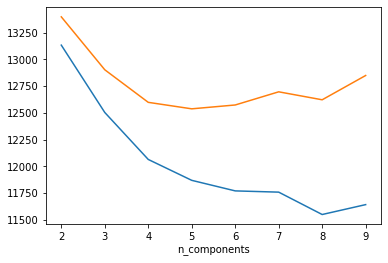

In [261]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster_copy)
    aic.append(gmm.aic(station_cluster_copy))
    bic.append(gmm.bic(station_cluster_copy))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

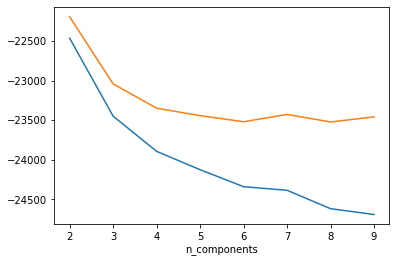

In [625]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster)
    aic.append(gmm.aic(station_cluster))
    bic.append(gmm.bic(station_cluster))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

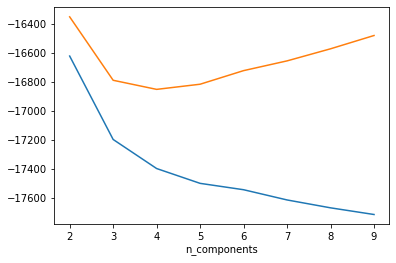

In [626]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster_norm)
    aic.append(gmm.aic(station_cluster_norm))
    bic.append(gmm.bic(station_cluster_norm))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

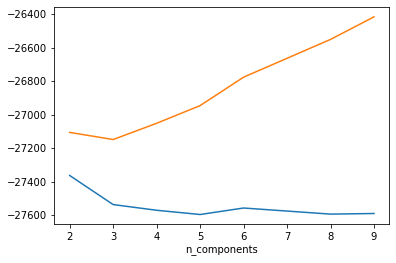

In [689]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster_percent)
    aic.append(gmm.aic(station_cluster_percent))
    bic.append(gmm.bic(station_cluster_percent))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

In [ ]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=4, n_init=100).fit(station_cluster_copy)
print(gmm.aic(station_cluster_copy))
print(gmm.bic(station_cluster_copy))
cluster = pd.Series(gmm.predict(station_cluster_copy), name='cluster') + 1
station_clu = station_cluster_copy.reset_index()
station_clu.rename(columns={'end station name':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday peak 2019Sub'],station_clu['weekend peak 2019Sub'],station_clu['weekday non peak 2019Sub'],station_clu['weekend non peak 2019Sub'],station_clu['weekday rest 2019Sub'],station_clu['weekend rest 2019Sub'],cluster],axis=1)
#station_clu.to_csv('E:/SI/data/Station/station cluster.csv')
station_clu

In [631]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=6, n_init=100).fit(station_cluster)
print(gmm.aic(station_cluster))
print(gmm.bic(station_cluster))
cluster = pd.Series(gmm.predict(station_cluster), name='cluster') + 1
station_clu = station_cluster.reset_index()
station_clu.rename(columns={'end station name':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday peak 2021Cus'],station_clu['weekend peak 2021Cus'],station_clu['weekday non peak 2021Cus'],station_clu['weekend non peak 2021Cus'],station_clu['weekday rest 2021Cus'],station_clu['weekend rest 2021Cus'],cluster],axis=1)
#station_clu.to_csv('E:/SI/data/Station/station cluster.csv')
station_clu

-24341.18715643057
-23521.091774840927


,station name,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus,cluster
0,West St & Chambers St,1.000000,0.516724,0.471850,0.593829,0.370575,0.131607,3
1,10 Ave & W 14 St,0.761093,0.875189,0.825506,1.000000,0.412207,0.296594,3
2,12 Ave & W 40 St,0.729031,0.739867,0.443510,0.677094,0.096789,0.047907,3
3,7 Ave & Central Park South,0.679602,1.000000,0.763071,0.787631,0.144772,0.014105,3
4,Cleveland Pl & Spring St,0.649990,0.432098,0.448179,0.477780,0.604845,0.538038,5
...,...,...,...,...,...,...,...,...
998,49 St & 31 Ave,-0.153565,-0.104535,-0.101905,-0.124514,-0.177703,-0.150077,2
999,Broadway & 49 St,-0.152229,-0.103337,-0.100819,-0.125094,-0.165707,-0.153296,2
1000,Somers St & Broadway,-0.153565,-0.099479,-0.099951,-0.125094,-0.152300,-0.136395,2
1001,E 41 St & Madison Ave (SW corner),-0.158241,-0.104668,-0.101688,-0.131767,-0.184759,-0.155711,2


In [636]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=4, n_init=100).fit(station_cluster_norm)
print(gmm.aic(station_cluster_norm))
print(gmm.bic(station_cluster_norm))
cluster = pd.Series(gmm.predict(station_cluster_norm), name='cluster') + 1
station_clu = station_cluster_norm.reset_index()
station_clu.rename(columns={'end station name':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday peak 2021Cus'],station_clu['weekend peak 2021Cus'],station_clu['weekday non peak 2021Cus'],station_clu['weekend non peak 2021Cus'],station_clu['weekday rest 2021Cus'],station_clu['weekend rest 2021Cus'],cluster],axis=1)
#station_clu.to_csv('E:/SI/data/Cluster/station cluster norm.csv',index=False)
station_clu

-17395.511281469044
-16850.41794400527


,station name,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus,cluster
0,West St & Chambers St,1.0,1.258235,0.511177,0.560374,0.065014,0.080245,4
1,10 Ave & W 14 St,1.0,2.489113,1.034367,1.097412,0.087857,0.158415,2
2,12 Ave & W 40 St,1.0,2.223898,0.633557,0.813501,0.043316,0.074351,2
3,7 Ave & Central Park South,1.0,3.075204,1.058366,0.978217,0.053529,0.065788,2
4,Cleveland Pl & Spring St,1.0,1.555216,0.700847,0.673494,0.131778,0.275578,4
...,...,...,...,...,...,...,...,...
998,49 St & 31 Ave,1.0,0.924528,0.632075,0.836478,0.137466,0.220126,4
999,Broadway & 49 St,1.0,1.044068,0.652542,0.711864,0.246973,0.118644,1
1000,Somers St & Broadway,1.0,1.928302,0.801887,0.792453,0.428571,0.594340,3
1001,E 41 St & Madison Ave (SW corner),1.0,1.487500,1.078125,0.473958,0.093750,0.109375,2


In [697]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=4, n_init=100).fit(station_cluster_percent)
print(gmm.aic(station_cluster_percent))
print(gmm.bic(station_cluster_percent))
cluster = pd.Series(gmm.predict(station_cluster_percent), name='cluster') + 1
station_clu = station_cluster_percent.reset_index()
station_clu.rename(columns={'end station name':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday peak 2019Cus'],station_clu['weekend peak 2019Cus'],
                        station_clu['weekday non peak 2019Cus'],station_clu['weekend non peak 2019Cus'],station_clu['weekday rest 2019Cus'],station_clu['weekend rest 2019Cus'],cluster],axis=1)
#station_clu.to_csv('E:/SI/data/Cluster/station cluster percent.csv',index=False)
station_clu

-27572.01859439383
-27052.583084765105


,station name,weekday peak 2019Cus,weekend peak 2019Cus,weekday non peak 2019Cus,weekend non peak 2019Cus,weekday rest 2019Cus,weekend rest 2019Cus,cluster
0,12 Ave & W 40 St,0.223770,0.434179,0.124596,0.202229,0.004362,0.010863,1
1,West St & Chambers St,0.238384,0.426289,0.112931,0.198811,0.006164,0.017421,4
2,5 Ave & E 73 St,0.222296,0.431313,0.166392,0.172336,0.002927,0.004737,1
3,W 34 St & 11 Ave,0.208569,0.476072,0.123108,0.175750,0.005121,0.011380,1
4,Centre St & Chambers St,0.201667,0.406164,0.130343,0.226332,0.012528,0.022965,1
...,...,...,...,...,...,...,...,...
791,Willoughby Ave & Myrtle Ave,0.115691,0.329243,0.108749,0.247601,0.049582,0.149134,3
792,11 St & 35 Ave,0.180676,0.501642,0.158995,0.114960,0.025811,0.017916,2
793,Withers St & Kingsland Ave,0.144173,0.250182,0.122547,0.250182,0.072086,0.160831,3
794,Harrison Pl & Porter Ave,0.282687,0.392436,0.124382,0.098109,0.032307,0.070078,2


In [647]:
station_clu.to_csv('E:/SI/data/Cluster/station cluster percent 2021Cus.csv',index=False)

## Cluster analysis

In [698]:
station_clu.value_counts(['cluster']).sort_index()

cluster
1          206
2           48
3          142
4          400
dtype: int64

In [705]:
station_clu = pd.read_csv('E:/SI/data/Cluster/station cluster percent 2021Cus.csv')

In [706]:
cluster_mean = station_clu[['weekday peak 2021Cus','weekday non peak 2021Cus','weekday rest 2021Cus','weekend peak 2021Cus','weekend non peak 2021Cus','weekend rest 2021Cus','cluster']].groupby('cluster').mean().T
cluster_mean_wk = station_clu[['weekday peak 2021Cus','weekday non peak 2021Cus','weekday rest 2021Cus','cluster']].groupby('cluster').mean().T
cluster_mean_wd = station_clu[['weekend peak 2021Cus','weekend non peak 2021Cus','weekend rest 2021Cus','cluster']].groupby('cluster').mean().T

<AxesSubplot:>

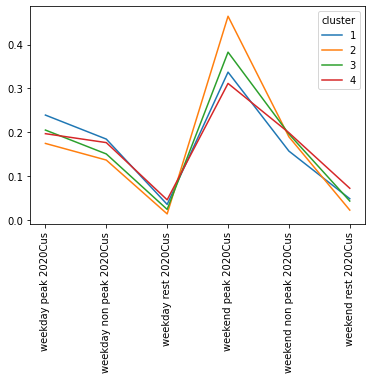

In [704]:
cluster_mean.plot(rot=90)

<AxesSubplot:>

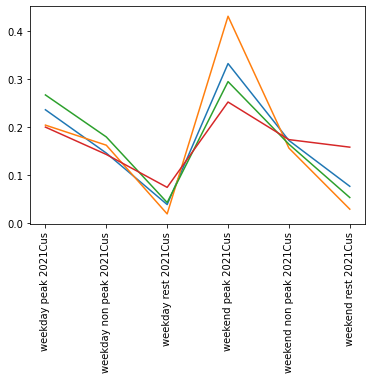

In [707]:
cluster_mean[1].plot(rot=90)
cluster_mean[3].plot(rot=90)
cluster_mean[4].plot(rot=90)
cluster_mean[2].plot(rot=90)

## 合并2019-2021

In [1]:
import pandas as pd
sc_2019_Sub = pd.read_csv('E:/SI/data/Cluster/station cluster 2019Sub.csv')
sc_2019_Sub = sc_2019_Sub.set_index('end station name')
sc_2019_Cus = pd.read_csv('E:/SI/data/Cluster/station cluster 2019Cus.csv')
sc_2019_Cus = sc_2019_Cus.set_index('end station name')
sc_2020_Sub = pd.read_csv('E:/SI/data/Cluster/station cluster 2020Sub.csv')
sc_2020_Sub = sc_2020_Sub.set_index('end station name')
sc_2020_Cus = pd.read_csv('E:/SI/data/Cluster/station cluster 2020Cus.csv')
sc_2020_Cus = sc_2020_Cus.set_index('end station name')
sc_2021_Sub = pd.read_csv('E:/SI/data/Cluster/station cluster 2021Sub.csv')
sc_2021_Sub = sc_2021_Sub.set_index('end station name')
sc_2021_Cus = pd.read_csv('E:/SI/data/Cluster/station cluster 2021Cus.csv')
sc_2021_Cus = sc_2021_Cus.set_index('end station name')

In [2]:
sc_Sub = pd.concat([sc_2019_Sub,sc_2020_Sub,sc_2021_Sub],axis=1)
sc_Sub = sc_Sub.dropna()
#sc_Sub.to_csv('E:/SI/data/Cluster/station cluster Sub.csv')
sc_Sub

,weekday peak 2019Sub,weekend peak 2019Sub,weekday non peak 2019Sub,weekend non peak 2019Sub,weekday rest 2019Sub,weekend rest 2019Sub,weekday 2019Sub,weekend 2019Sub,weekday peak 2020Sub,weekend peak 2020Sub,...,weekday 2020Sub,weekend 2020Sub,weekday peak 2021Sub,weekend peak 2021Sub,weekday non peak 2021Sub,weekend non peak 2021Sub,weekday rest 2021Sub,weekend rest 2021Sub,weekday 2021Sub,weekend 2021Sub
Pershing Square North,188.192090,24.222689,39.782486,16.710784,5.222458,2.362745,1330.711864,356.941176,44.468750,18.169118,...,422.218750,234.500000,72.820106,19.798942,24.701058,12.870370,3.047619,1.895062,621.206349,278.814815
8 Ave & W 31 St,98.994350,23.100840,32.409605,15.151961,6.182203,2.735294,1010.169492,336.735294,29.406250,16.779412,...,340.515625,220.911765,46.343915,21.296296,20.708995,11.067901,4.404762,2.956790,512.968254,290.740741
West St & Chambers St,107.649718,42.848739,24.166667,20.460784,3.885593,1.607843,822.711864,516.617647,60.317708,50.117647,...,596.625000,603.970588,70.724868,35.460317,24.880952,20.030864,5.732804,2.203704,644.460317,465.296296
12 Ave & W 40 St,99.559322,38.756303,20.649718,16.186275,2.381356,1.588235,700.000000,454.176471,54.385417,62.595588,...,543.812500,684.205882,44.269841,48.518519,19.886243,19.302469,2.833333,1.827160,433.349206,559.444444
E 47 St & Park Ave,110.519774,6.571429,18.500000,5.137255,1.915254,0.318627,724.338983,96.941176,24.651042,3.529412,...,217.078125,46.323529,32.825397,4.465608,12.521164,2.827160,0.698413,0.450617,308.238095,63.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morgan Ave & Maspeth Ave,0.084746,0.155462,0.036723,0.088235,0.019068,0.039216,1.016949,2.000000,1.979167,1.897059,...,20.234375,21.323529,3.365079,1.899471,1.121693,0.888889,0.169312,0.197531,26.825397,23.925926
Stewart Ave & Johnson Ave,0.045198,0.079832,0.042373,0.039216,0.021186,0.073529,0.915254,1.470588,0.755208,0.875000,...,11.609375,10.147059,0.936508,1.280423,0.616402,0.858025,0.537037,1.327160,15.730159,26.925926
Metropolitan Ave & Vandervoort Ave,0.056497,0.067227,0.019774,0.039216,0.012712,0.078431,0.576271,1.294118,0.427083,0.742647,...,5.375000,6.970588,0.910053,0.470899,0.383598,0.253086,0.201058,0.518519,8.603175,9.666667
Bushwick Ave & Harman St,0.039548,0.029412,0.019774,0.039216,0.021186,0.024510,0.593220,0.705882,1.760417,2.088235,...,25.921875,31.205882,2.936508,2.804233,1.896825,1.932099,0.949735,0.975309,40.619048,44.962963


In [3]:
sc_Cus = pd.concat([sc_2019_Cus,sc_2020_Cus,sc_2021_Cus],axis=1)
sc_Cus = sc_Cus.dropna()
#sc_Cus.to_csv('E:/SI/data/Cluster/station cluster Cus.csv')
sc_Cus

,weekday peak 2019Cus,weekend peak 2019Cus,weekday non peak 2019Cus,weekend non peak 2019Cus,weekday rest 2019Cus,weekend rest 2019Cus,weekday 2019Cus,weekend 2019Cus,weekday peak 2020Cus,weekend peak 2020Cus,...,weekday 2020Cus,weekend 2020Cus,weekday peak 2021Cus,weekend peak 2021Cus,weekday non peak 2021Cus,weekend non peak 2021Cus,weekday rest 2021Cus,weekend rest 2021Cus,weekday 2021Cus,weekend 2021Cus
12 Ave & W 40 St,23.974576,46.517647,13.349153,21.666667,0.467312,1.163866,231.762712,464.176471,15.414062,46.720588,...,208.546875,450.323529,21.253968,47.266667,13.465608,17.290123,0.920635,1.580247,236.555556,482.777778
West St & Chambers St,22.940678,41.023529,10.867797,19.132353,0.593220,1.676471,203.220339,414.294118,17.128906,38.161765,...,219.781250,397.970588,27.693122,34.844444,14.156085,15.518519,1.800454,2.222222,290.428571,383.814815
W 34 St & 11 Ave,16.864407,38.494118,9.954237,14.210784,0.414044,0.920168,168.949153,351.764706,7.156250,17.426471,...,86.937500,165.588235,17.010582,35.814815,12.788360,12.203704,1.047619,1.685185,196.285714,360.148148
Centre St & Chambers St,17.305085,34.852941,11.184746,19.421569,1.075061,1.970588,191.423729,383.588235,6.312500,24.375000,...,102.000000,236.794118,11.809524,30.370370,11.798942,11.746914,1.312925,2.185185,170.444444,328.444444
Central Park S & 6 Ave,16.508475,54.235294,17.925424,24.053922,0.510896,1.294118,256.220339,532.117647,11.992188,48.066176,...,170.890625,404.970588,19.714286,61.022222,27.023810,18.425926,1.043084,1.604938,311.095238,572.481481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47 Ave & Skillman Ave,0.135593,0.070588,0.152542,0.205882,0.012107,0.021008,2.254237,2.441176,0.351562,0.345588,...,4.015625,3.794118,0.359788,0.281481,0.208995,0.123457,0.061224,0.061728,4.126984,3.629630
Willoughby Ave & Myrtle Ave,0.084746,0.241176,0.079661,0.181373,0.036320,0.109244,1.474576,4.058824,1.910156,3.294118,...,29.640625,46.588235,3.708995,4.437037,2.084656,3.166667,2.074830,4.395062,63.634921,92.962963
Withers St & Kingsland Ave,0.033898,0.058824,0.028814,0.058824,0.016949,0.037815,0.661017,1.058824,0.660156,1.044118,...,10.421875,13.588235,1.074074,1.274074,0.828042,0.895062,0.292517,0.561728,17.968254,21.740741
Harrison Pl & Porter Ave,0.084746,0.117647,0.037288,0.029412,0.009685,0.021008,0.677966,1.205882,0.910156,0.830882,...,10.875000,10.441176,0.925926,0.755556,0.740741,0.734568,0.256236,0.981481,13.984127,19.222222


### wk&kd

In [15]:
station_cluster = sc_Sub[['weekday 2019Sub','weekend 2019Sub','weekday 2020Sub','weekend 2020Sub','weekday 2021Sub','weekend 2021Sub']]

In [19]:
station_cluster = sc_Cus[['weekday 2019Cus','weekend 2019Cus','weekday 2020Cus','weekend 2020Cus','weekday 2021Cus','weekend 2021Cus']]

In [22]:
station_cluster

,weekday 2019Cus,weekend 2019Cus,weekday 2020Cus,weekend 2020Cus,weekday 2021Cus,weekend 2021Cus
12 Ave & W 40 St,231.762712,464.176471,208.546875,450.323529,236.555556,482.777778
West St & Chambers St,203.220339,414.294118,219.781250,397.970588,290.428571,383.814815
W 34 St & 11 Ave,168.949153,351.764706,86.937500,165.588235,196.285714,360.148148
Centre St & Chambers St,191.423729,383.588235,102.000000,236.794118,170.444444,328.444444
Central Park S & 6 Ave,256.220339,532.117647,170.890625,404.970588,311.095238,572.481481
...,...,...,...,...,...,...
47 Ave & Skillman Ave,2.254237,2.441176,4.015625,3.794118,4.126984,3.629630
Willoughby Ave & Myrtle Ave,1.474576,4.058824,29.640625,46.588235,63.634921,92.962963
Withers St & Kingsland Ave,0.661017,1.058824,10.421875,13.588235,17.968254,21.740741
Harrison Pl & Porter Ave,0.677966,1.205882,10.875000,10.441176,13.984127,19.222222


In [20]:
import numpy as np
from copy import deepcopy
station_cluster_copy = deepcopy(station_cluster) # 深度复制，与源无关
# 按列归一化[-1,1]
for i in station_cluster.columns:
    station_cluster[i] = (station_cluster[i] - np.mean(station_cluster[i])) / np.max(station_cluster[i] - np.mean(station_cluster[i])) # -1<(i-i_average)/max(i-i_average)<1

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 以2021weekday为基准
station_cluster_norm = deepcopy(station_cluster_copy)
station_cluster_norm['weekday 2019Cus'] = station_cluster_norm['weekday 2019Cus']/station_cluster_copy['weekday 2021Cus']
station_cluster_norm['weekend 2019Cus'] = station_cluster_norm['weekend 2019Cus']/station_cluster_copy['weekday 2021Cus']
station_cluster_norm['weekday 2020Cus'] = station_cluster_norm['weekday 2020Cus']/station_cluster_copy['weekday 2021Cus']
station_cluster_norm['weekend 2020Cus'] = station_cluster_norm['weekend 2020Cus']/station_cluster_copy['weekday 2021Cus']
station_cluster_norm['weekday 2021Cus'] = station_cluster_norm['weekday 2021Cus']/station_cluster_copy['weekday 2021Cus']
station_cluster_norm['weekend 2021Cus'] = station_cluster_norm['weekend 2021Cus']/station_cluster_copy['weekday 2021Cus']

In [782]:
station_cluster_norm

,weekday 2019Cus,weekend 2019Cus,weekday 2020Cus,weekend 2020Cus,weekday 2021Cus,weekend 2021Cus
12 Ave & W 40 St,0.979739,1.962230,0.881598,1.903669,1.0,2.040864
West St & Chambers St,0.699726,1.426492,0.756748,1.370287,1.0,1.321546
W 34 St & 11 Ave,0.860731,1.792105,0.442913,0.843608,1.0,1.834816
Centre St & Chambers St,1.123086,2.250518,0.598435,1.389274,1.0,1.926988
Central Park S & 6 Ave,0.823607,1.710465,0.549319,1.301758,1.0,1.840213
...,...,...,...,...,...,...
47 Ave & Skillman Ave,0.546219,0.591516,0.973017,0.919344,1.0,0.879487
Willoughby Ave & Myrtle Ave,0.023172,0.063783,0.465792,0.732117,1.0,1.460880
Withers St & Kingsland Ave,0.036788,0.058927,0.580016,0.756236,1.0,1.209953
Harrison Pl & Porter Ave,0.048481,0.086232,0.777667,0.746645,1.0,1.374574


In [21]:
# 按行进行归一化
station_cluster_percent = deepcopy(station_cluster_copy)
station_cluster_percent = station_cluster_percent.div(station_cluster_percent.sum(axis=1), axis=0)

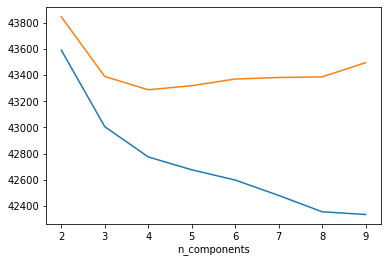

In [17]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster_copy)
    aic.append(gmm.aic(station_cluster_copy))
    bic.append(gmm.bic(station_cluster_copy))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

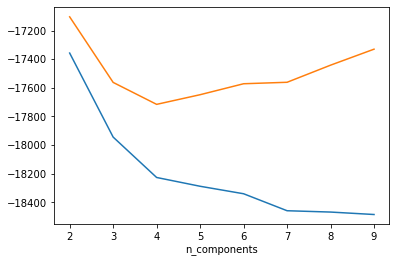

In [784]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster)
    aic.append(gmm.aic(station_cluster))
    bic.append(gmm.bic(station_cluster))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

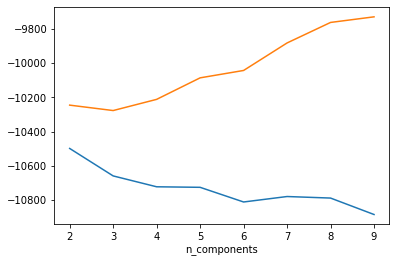

In [785]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
n_components = np.arange(2,10)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=10).fit(station_cluster_norm)
    aic.append(gmm.aic(station_cluster_norm))
    bic.append(gmm.bic(station_cluster_norm))

plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('n_components')
plt.show()

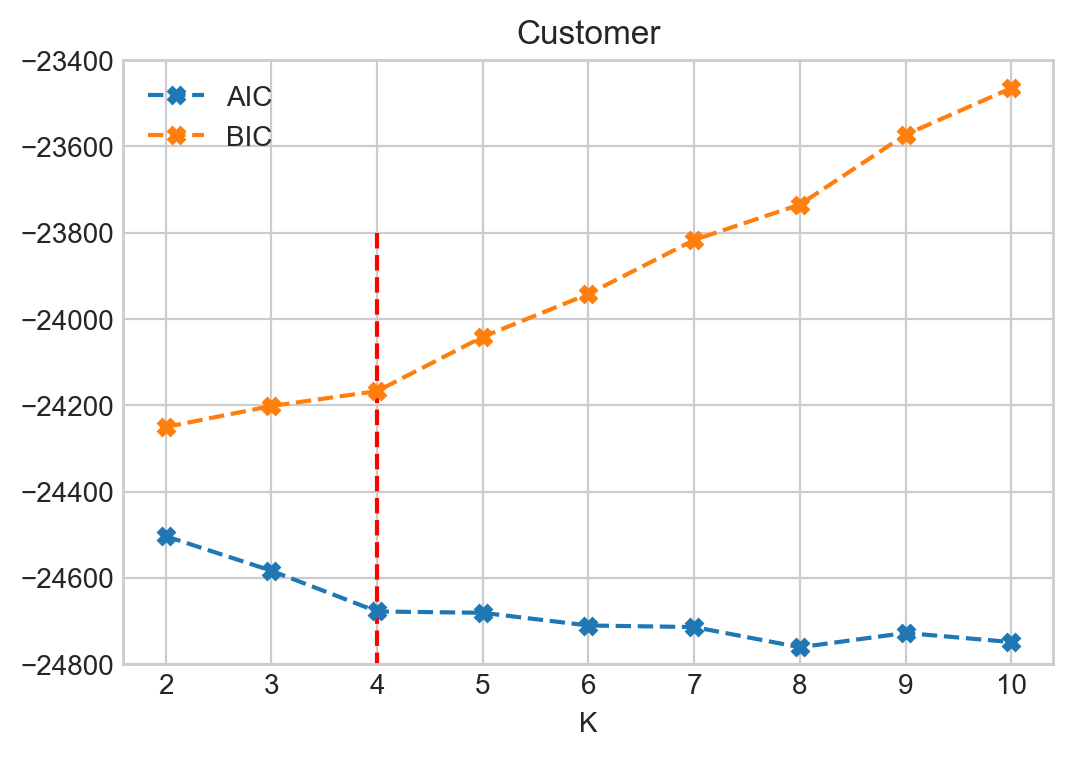

In [22]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
n_components = np.arange(2,11)
aic = []
bic = []
for i in n_components:
    gmm = GMM(n_components=i, n_init=100, max_iter=100, warm_start=True).fit(station_cluster_percent)
    aic.append(gmm.aic(station_cluster_percent))
    bic.append(gmm.bic(station_cluster_percent))

plt.plot(n_components, aic, label='AIC',linestyle='--',marker='X')
plt.plot(n_components, bic, label='BIC',linestyle='--',marker='X')
#plt.vlines(4,-24400,-25500, linestyles='dashed', colors='red')
plt.vlines(4,-23800,-24800, linestyles='dashed', colors='red')
plt.xlabel('K')
#plt.ylim([-25500,-24000])
plt.ylim([-24800,-23400])
plt.xticks([2,3,4,5,6,7,8,9,10])
#plt.title('Subscriber')
plt.title('Customer')
plt.legend()

In [18]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=4, n_init=100).fit(station_cluster_copy)
print(gmm.aic(station_cluster_copy))
print(gmm.bic(station_cluster_copy))
cluster = pd.Series(gmm.predict(station_cluster_copy), name='cluster') + 1
station_clu = station_cluster_copy.reset_index()
station_clu.rename(columns={'index':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday 2019Sub'],station_clu['weekend 2019Sub'],
                        station_clu['weekday 2020Sub'],station_clu['weekend 2020Sub'],station_clu['weekday 2021Sub'],station_clu['weekend 2021Sub'],cluster],axis=1)
station_clu.to_csv('E:/SI/data/Cluster/station cluster primary Sub.csv',index=False)
station_clu

42773.818790204234
43288.26309292688


,station name,weekday 2019Sub,weekend 2019Sub,weekday 2020Sub,weekend 2020Sub,weekday 2021Sub,weekend 2021Sub,cluster
0,Pershing Square North,1330.711864,356.941176,422.218750,234.500000,621.206349,278.814815,3
1,8 Ave & W 31 St,1010.169492,336.735294,340.515625,220.911765,512.968254,290.740741,3
2,West St & Chambers St,822.711864,516.617647,596.625000,603.970588,644.460317,465.296296,3
3,12 Ave & W 40 St,700.000000,454.176471,543.812500,684.205882,433.349206,559.444444,3
4,E 47 St & Park Ave,724.338983,96.941176,217.078125,46.323529,308.238095,63.222222,3
...,...,...,...,...,...,...,...,...
756,Morgan Ave & Maspeth Ave,1.016949,2.000000,20.234375,21.323529,26.825397,23.925926,4
757,Stewart Ave & Johnson Ave,0.915254,1.470588,11.609375,10.147059,15.730159,26.925926,4
758,Metropolitan Ave & Vandervoort Ave,0.576271,1.294118,5.375000,6.970588,8.603175,9.666667,4
759,Bushwick Ave & Harman St,0.593220,0.705882,25.921875,31.205882,40.619048,44.962963,4


In [787]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=4, n_init=100).fit(station_cluster)
print(gmm.aic(station_cluster))
print(gmm.bic(station_cluster))
cluster = pd.Series(gmm.predict(station_cluster), name='cluster') + 1
station_clu = station_cluster.reset_index()
station_clu.rename(columns={'index':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday 2019Cus'],station_clu['weekend 2019Cus'],
                        station_clu['weekday 2020Cus'],station_clu['weekend 2020Cus'],station_clu['weekday 2021Cus'],station_clu['weekend 2021Cus'],cluster],axis=1)
station_clu.to_csv('E:/SI/data/Cluster/station cluster normalization Cus.csv',index=False)
station_clu

-18226.473015657422
-17715.73647247852


,station name,weekday 2019Cus,weekend 2019Cus,weekday 2020Cus,weekend 2020Cus,weekday 2021Cus,weekend 2021Cus,cluster
0,12 Ave & W 40 St,0.893531,0.858986,0.937230,1.000000,0.707938,0.786182,3
1,West St & Chambers St,0.769281,0.755454,1.000000,0.864244,0.919024,0.591789,3
2,W 34 St & 11 Ave,0.620091,0.625672,0.257759,0.261657,0.550152,0.545301,3
3,Centre St & Chambers St,0.717928,0.691723,0.341918,0.446300,0.448900,0.483025,3
4,Central Park S & 6 Ave,1.000000,1.000000,0.726832,0.882396,1.000000,0.962387,3
...,...,...,...,...,...,...,...,...
731,47 Ave & Skillman Ave,-0.105564,-0.099358,-0.205553,-0.157889,-0.202767,-0.155009,2
732,Willoughby Ave & Myrtle Ave,-0.108958,-0.096001,-0.062377,-0.046921,0.030398,0.020469,1
733,Withers St & Kingsland Ave,-0.112500,-0.102227,-0.169759,-0.132492,-0.148534,-0.119433,2
734,Harrison Pl & Porter Ave,-0.112426,-0.101922,-0.167227,-0.140653,-0.164144,-0.124380,2


In [793]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=3, n_init=100).fit(station_cluster_norm)
print(gmm.aic(station_cluster_norm))
print(gmm.bic(station_cluster_norm))
cluster = pd.Series(gmm.predict(station_cluster_norm), name='cluster') + 1
station_clu = station_cluster_norm.reset_index()
station_clu.rename(columns={'index':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday 2019Cus'],station_clu['weekend 2019Cus'],
                        station_clu['weekday 2020Cus'],station_clu['weekend 2020Cus'],station_clu['weekday 2021Cus'],station_clu['weekend 2021Cus'],cluster],axis=1)
station_clu.to_csv('E:/SI/data/Cluster/station cluster norm Cus.csv',index=False)
station_clu

-10658.697493971638
-10276.795394117142


,station name,weekday 2019Cus,weekend 2019Cus,weekday 2020Cus,weekend 2020Cus,weekday 2021Cus,weekend 2021Cus,cluster
0,12 Ave & W 40 St,0.979739,1.962230,0.881598,1.903669,1.0,2.040864,2
1,West St & Chambers St,0.699726,1.426492,0.756748,1.370287,1.0,1.321546,2
2,W 34 St & 11 Ave,0.860731,1.792105,0.442913,0.843608,1.0,1.834816,2
3,Centre St & Chambers St,1.123086,2.250518,0.598435,1.389274,1.0,1.926988,2
4,Central Park S & 6 Ave,0.823607,1.710465,0.549319,1.301758,1.0,1.840213,2
...,...,...,...,...,...,...,...,...
731,47 Ave & Skillman Ave,0.546219,0.591516,0.973017,0.919344,1.0,0.879487,2
732,Willoughby Ave & Myrtle Ave,0.023172,0.063783,0.465792,0.732117,1.0,1.460880,1
733,Withers St & Kingsland Ave,0.036788,0.058927,0.580016,0.756236,1.0,1.209953,1
734,Harrison Pl & Porter Ave,0.048481,0.086232,0.777667,0.746645,1.0,1.374574,1


In [9]:
# GMM分类
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
gmm = GMM(n_components=4, n_init=100).fit(station_cluster_percent)
print(gmm.aic(station_cluster_percent))
print(gmm.bic(station_cluster_percent))
cluster = pd.Series(gmm.predict(station_cluster_percent), name='cluster') + 1
station_clu = station_cluster_percent.reset_index()
station_clu.rename(columns={'index':'station name'},inplace=True)
station_clu = pd.concat([station_clu['station name'],station_clu['weekday 2019Sub'],station_clu['weekend 2019Sub'],
                        station_clu['weekday 2020Sub'],station_clu['weekend 2020Sub'],station_clu['weekday 2021Sub'],station_clu['weekend 2021Sub'],cluster],axis=1)
#station_clu.to_csv('E:/SI/data/Cluster/station cluster percent Cus.csv',index=False)
station_clu

-25234.334003577907
-24719.88970085526


,station name,weekday 2019Sub,weekend 2019Sub,weekday 2020Sub,weekend 2020Sub,weekday 2021Sub,weekend 2021Sub,cluster
0,Pershing Square North,0.410157,0.110018,0.130138,0.072279,0.191471,0.085937,2
1,8 Ave & W 31 St,0.372476,0.124163,0.125557,0.081456,0.189145,0.107204,2
2,West St & Chambers St,0.225420,0.141551,0.163473,0.165486,0.176580,0.127490,1
3,12 Ave & W 40 St,0.207408,0.134571,0.161130,0.202728,0.128400,0.165762,2
4,E 47 St & Park Ave,0.497437,0.066574,0.149078,0.031813,0.211681,0.043418,2
...,...,...,...,...,...,...,...,...
756,Morgan Ave & Maspeth Ave,0.010668,0.020981,0.212265,0.223690,0.281406,0.250990,3
757,Stewart Ave & Johnson Ave,0.013702,0.022015,0.173797,0.151906,0.235487,0.403093,3
758,Metropolitan Ave & Vandervoort Ave,0.017739,0.039836,0.165457,0.214573,0.264829,0.297566,3
759,Bushwick Ave & Harman St,0.004119,0.004902,0.180002,0.216694,0.282059,0.312224,3
